In [44]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
#import the CSV file
df = pd.read_csv("sales_data.csv")
df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


**Data Cleaning**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [9]:
#converting the date column's data type to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [11]:
#checking null values
df.isnull().sum()

Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

**Performing Data Analysis**

***BOX PLOT***

In [13]:
sns.set_theme(style="whitegrid", palette="Set2")

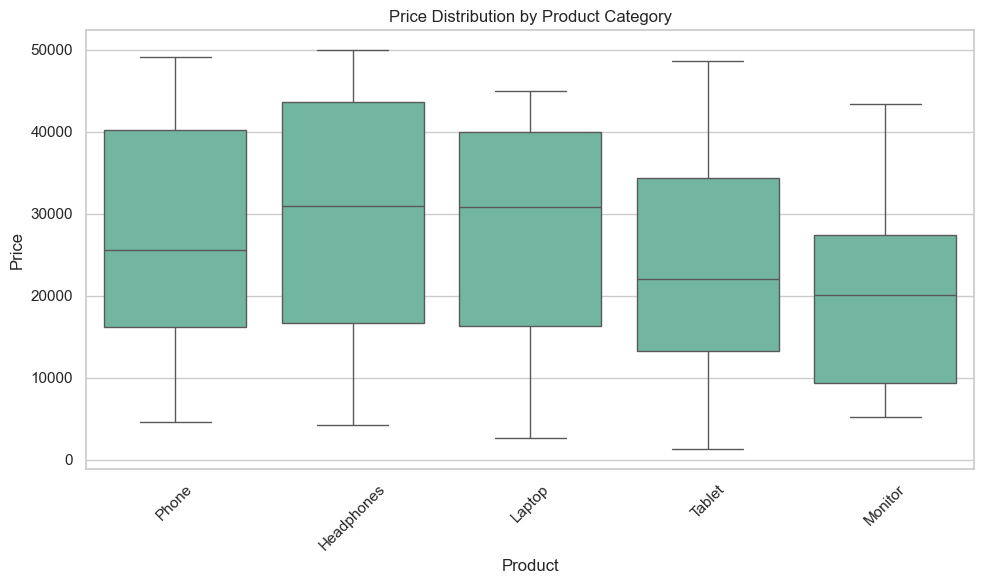

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Product', y='Price', data=df)
plt.title('Price Distribution by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visualizations/boxplot_price_category.png')
plt.show()

This boxplot shows that Headphones and laptops have high median prices, indicating them as premium-priced products, while tablets and monitors have low median prices, showing as budget-friendly categories. 

Headphones, laptops, and phones have varied price ranges, showing inconsistencies in the pricing, or could be multiple models, when compared to monitors that show less price variations, which proves it is budget-friendly. 

Headphones and phones are high-end premium SKUs as they have the highest price (~50,000)

**High price variations show opportunities to stabilise them, high-end priced products need marketing strategies to boost sales, low-priced products have the risk of margin erosion**

***VIOLIN PLOT***

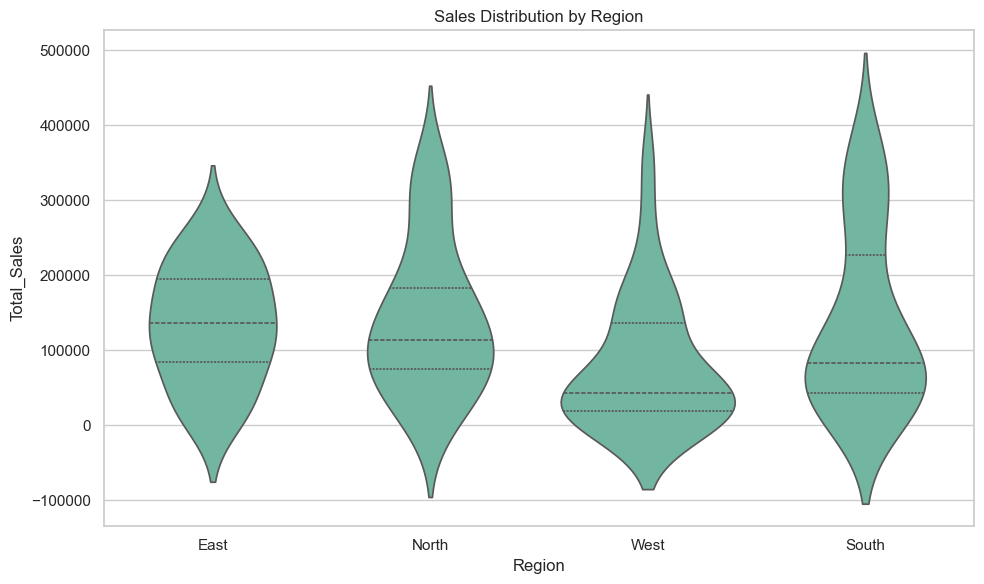

In [22]:
plt.figure(figsize=(10,6))
sns.violinplot(
    x='Region',
    y='Total_Sales',
    data=df,
    inner='quartile'
)
plt.title('Sales Distribution by Region')
plt.tight_layout()
plt.savefig('visualizations/violinplot_sales_region.png')
plt.show()

East region has the most consistent sales making mid to high range sales. This strategy can be implemented to have cosistent sales across regions. 

West and South region shows bulk low range sales but occasionally high margin sales. We should work on finding some stragies like promotions, grabbing potential clients to turn the long-neck outliers into a more common occurance.

North region looks bit like having two bumps. Here in this case there could be two segment of customers(small retail buyers and large corporate buyers) so two different strategies or campaigns are needed to boost the sales.

***HEATMAP***

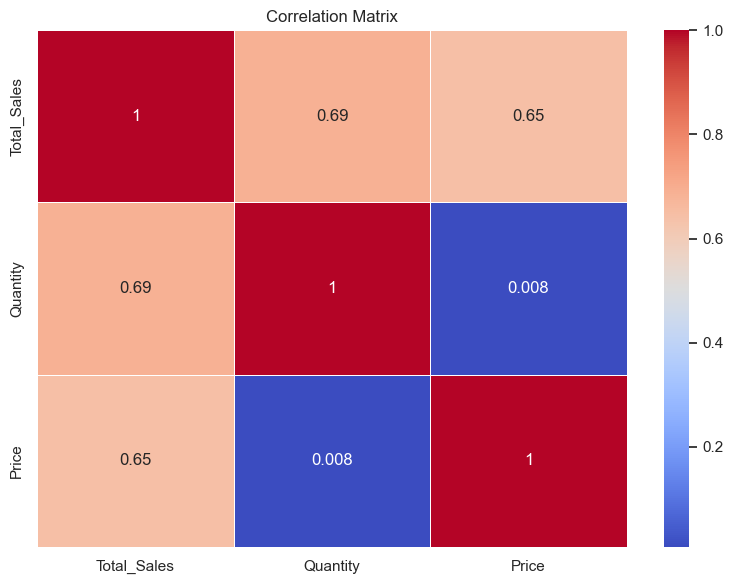

In [24]:
corr = df[['Total_Sales', 'Quantity', 'Price']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('visualizations/correlation_heatmap.png')
plt.show()

Total sales vs quantity ----> strong relationship

Total sales vs price ----> strong relationship

Quantity vs price ----> no relationship or neutral

Here, if the price goes up, the quantity still remains neutral (0.008), so we can still increase the price to boost sales

Quantity predicts the Sales (0.69 --> ~1), so focusing on volume-based tactics might help with improving sales

We should ensure that even high-priced products are stocked as well. They sell as frequently as low-priced products.



***HISTOGRAM***

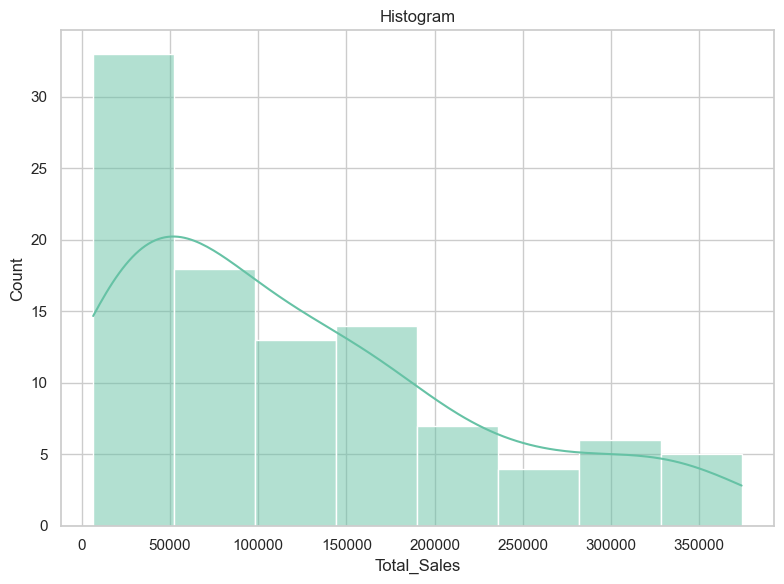

In [48]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Total_Sales', kde=True)
plt.title('Histogram')

plt.tight_layout()
plt.savefig('visualizations/Histogram.png')
plt.show()

Histogram shows most customers buy less priced items that makes sales from 0-50,000, that pulls up heavy administration costs, making less profit, highlighting dependency on high-volume, low-value sales.

So, if we try investing in building better sales training to move more customers from 50,000 into the 150,000+ products, we can make more profit.

***BOX PLOT***

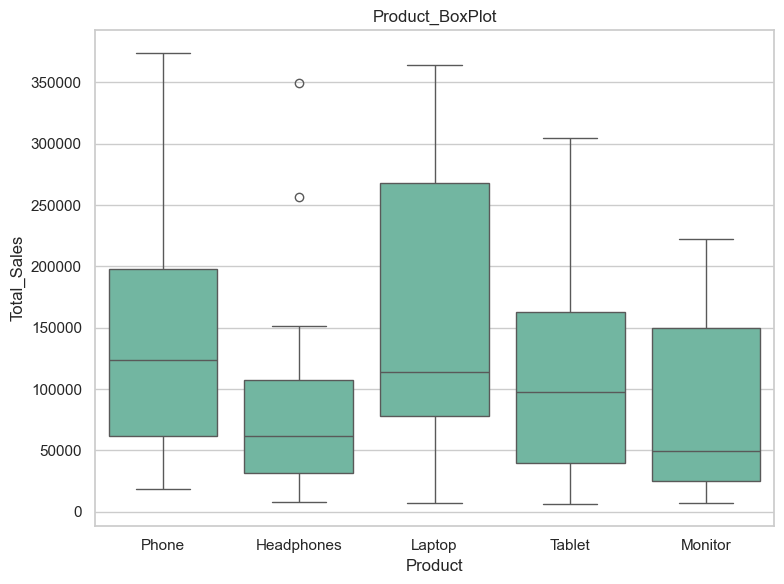

In [51]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Product', y='Total_Sales', data=df)
plt.title('Product_BoxPlot')

plt.tight_layout()
plt.savefig('visualizations/Product_boxplot.png')
plt.show()

Laptops and phones have made the highest sales with a median value of more than 1,00,000. Also, phones show a large variability (Long whiskers), possibly due to a wide pricing range. 

Headphones made the lowest overall sales, possibly due to varied product models and high-end premium SKUs, as they have the highest price (~50,000). 

Monitor remains the second lowest in sales, due to their budget-friendly prices. 



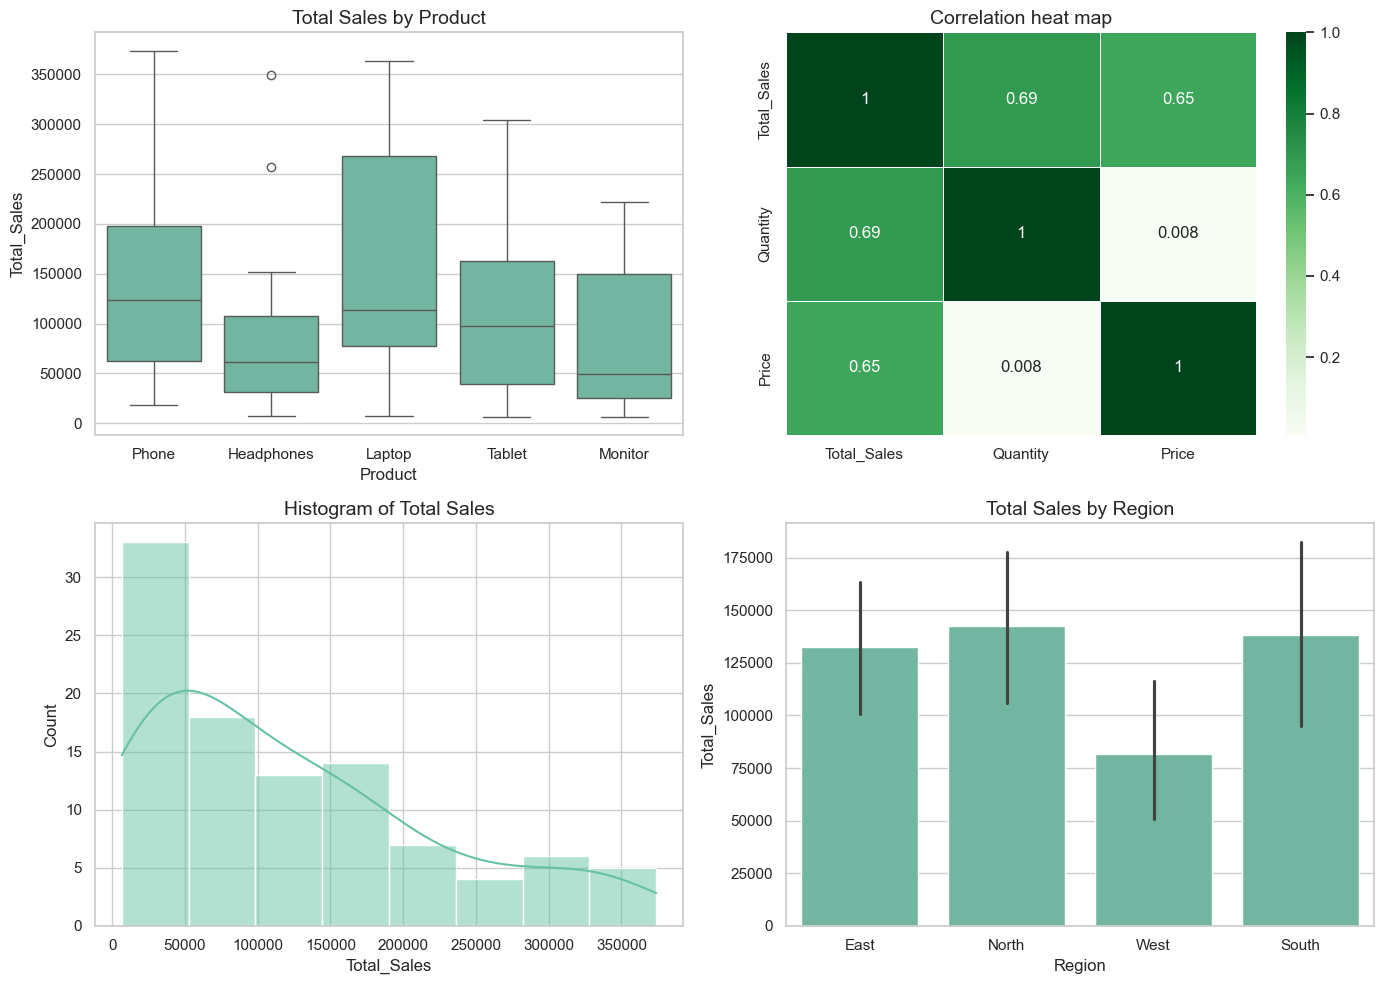

In [86]:
#Multi-plot Dashboard
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.boxplot(ax=axes[0,0], x='Product', y='Total_Sales', data=df) 
axes[0,0].set_title('Total Sales by Product') 
sns.heatmap(corr, annot=True, cmap='Greens',linewidths=0.5, ax=axes[0,1]) 
axes[0,1].set_title('Correlation heat map')
sns.histplot(data=df, x='Total_Sales', kde=True, ax=axes[1,0]) 
axes[1,0].set_title('Histogram of Total Sales')
sns.barplot(ax=axes[1,1], x='Region', y='Total_Sales', data=df) 
axes[1,1].set_title('Total Sales by Region')

plt.tight_layout()
plt.savefig('visualizations/multiplot dashboard.png')
plt.show()


Correlation Matrix: The near-zero correlation (0.008) between Price and Quantity suggests the business has significant pricing power, meaning prices can likely be increased without reducing the number of units sold.

Histogram: The high concentration of sales below 50,000 indicates a high-volume, low-value business model that may face thin profit margins due to the administrative costs of processing many small transactions.

Product Box Plot: The Laptop category shows the highest median sales and the widest range, identifying it as the primary driver for high-value revenue growth compared to lower-performing items like Headphones.

Regional Bar Chart: The West region shows significantly lower average sales and higher uncertainty than other regions, highlighting a specific geographic area that requires a targeted turnaround strategy or resource reallocation.

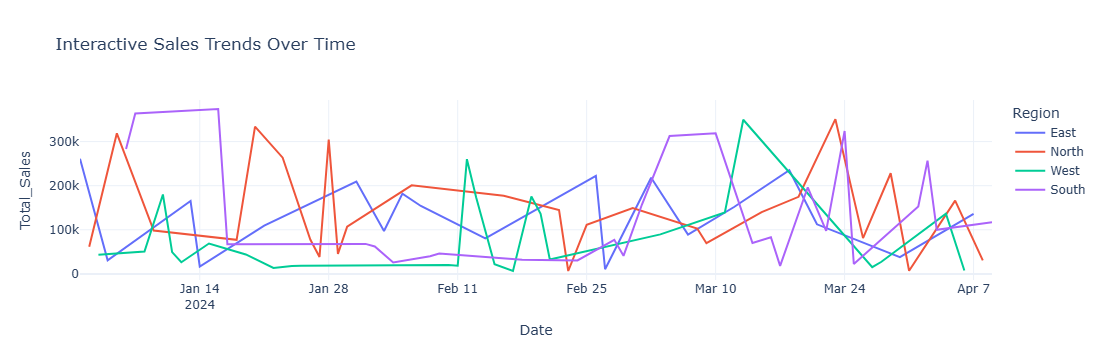

In [81]:
fig = px.line(
    df,
    x='Date',
    y='Total_Sales',
    color='Region',
    title='Interactive Sales Trends Over Time'
)

fig.update_layout(
    hovermode='x unified',
    template='plotly_white'
)

fig.write_html('visualizations/sales_trend_plotly.html')
fig.show()

**Dashboard**

In [52]:
PRIMARY_COLOR = "#2C3E50"
ACCENT_COLOR = "#1ABC9C"

sns.set_theme(
    style="whitegrid",
    palette="Set2",
    rc={
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "figure.figsize": (14, 8)
    }
)

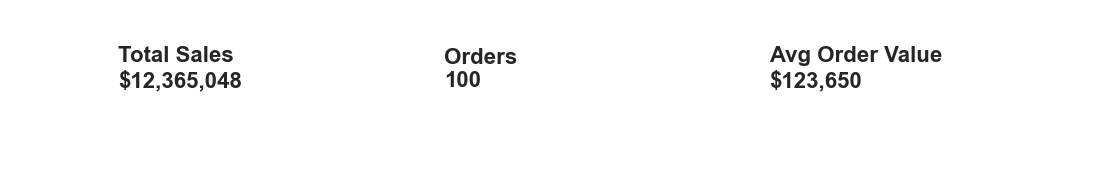

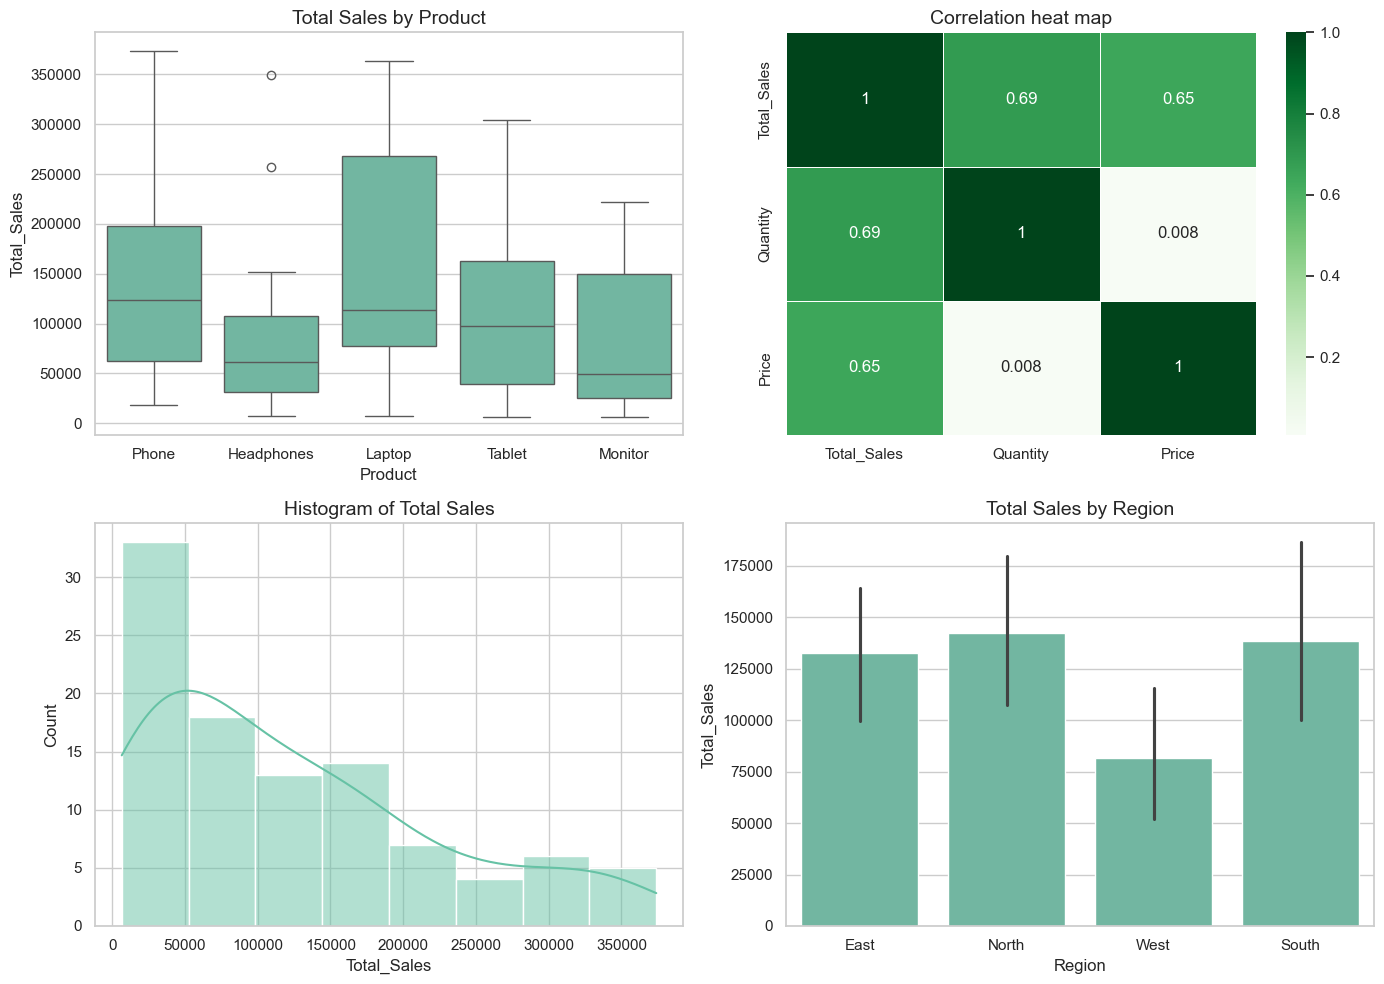

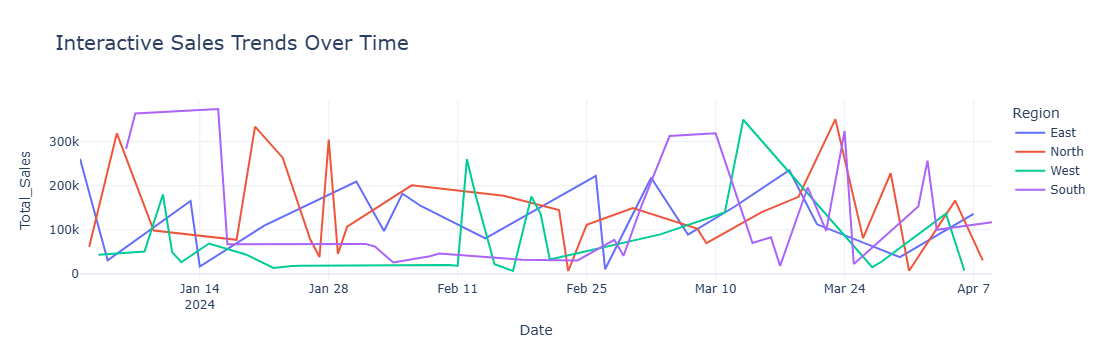

In [85]:
#Building a Dashboard
total_sales = df['Total_Sales'].sum()
total_orders = df.shape[0]
avg_order_value = df['Total_Sales'].mean()

fig, ax = plt.subplots(figsize=(14, 2))
ax.axis('off')

ax.text(0.1, 0.5, f"Total Sales\n${total_sales:,.0f}", fontsize=16, weight='bold')
ax.text(0.4, 0.5, f"Orders\n{total_orders}", fontsize=16, weight='bold')
ax.text(0.7, 0.5, f"Avg Order Value\n${avg_order_value:,.0f}", fontsize=16, weight='bold')

fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.boxplot(ax=axes[0,0], x='Product', y='Total_Sales', data=df) 
axes[0,0].set_title('Total Sales by Product') 
sns.heatmap(corr, annot=True, cmap='Greens',linewidths=0.5, ax=axes[0,1]) 
axes[0,1].set_title('Correlation heat map')
sns.histplot(data=df, x='Total_Sales', kde=True, ax=axes[1,0]) 
axes[1,0].set_title('Histogram of Total Sales')
sns.barplot(ax=axes[1,1], x='Region', y='Total_Sales', data=df) 
axes[1,1].set_title('Total Sales by Region')

plt.tight_layout()


fig = px.line(
    df,
    x='Date',
    y='Total_Sales',
    color='Region',
    title='Interactive Sales Trends Over Time',
    template='plotly_white'
)

fig.update_layout(
    title_font_size=20,
    hovermode='x unified'
)

plt.show()
fig.show()



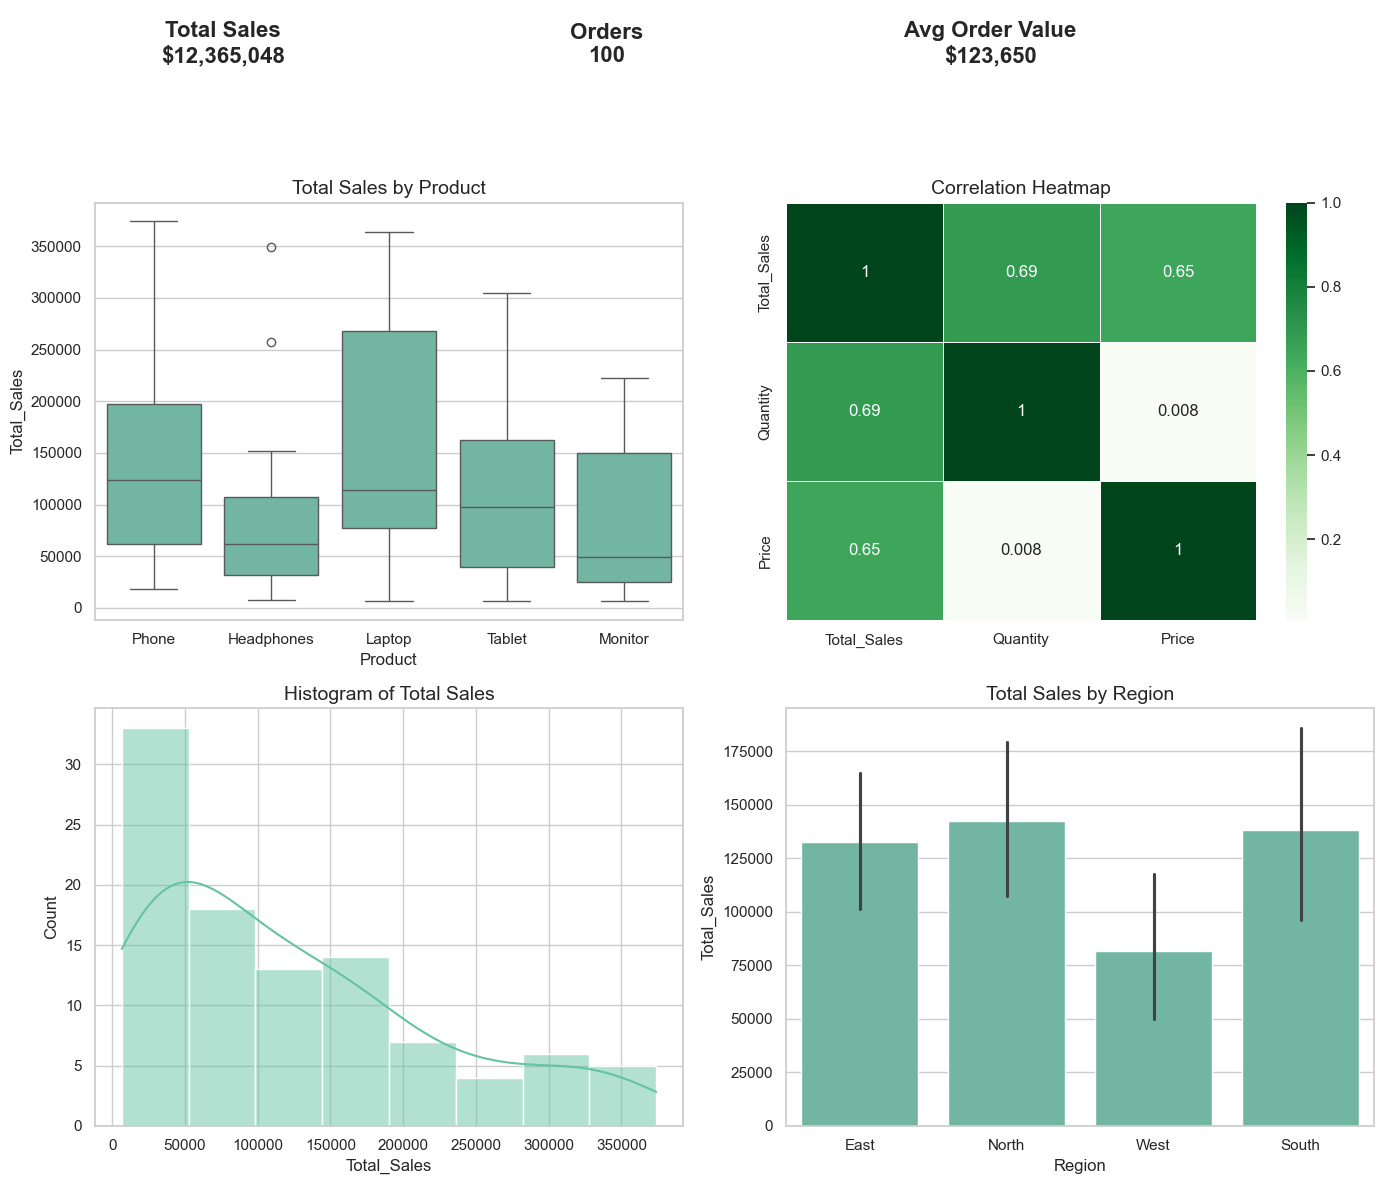

In [83]:
#To save the dashboard
from matplotlib.gridspec import GridSpec

total_sales = df['Total_Sales'].sum()
total_orders = df.shape[0]
avg_order_value = df['Total_Sales'].mean()

fig = plt.figure(figsize=(14, 12))
gs = GridSpec(3, 2, height_ratios=[1, 4, 4])

# ---- KPI ROW ----
ax_kpi = fig.add_subplot(gs[0, :])
ax_kpi.axis('off')

ax_kpi.text(0.1, 0.5, f"Total Sales\n${total_sales:,.0f}", fontsize=16, weight='bold', ha='center')
ax_kpi.text(0.4, 0.5, f"Orders\n{total_orders}", fontsize=16, weight='bold', ha='center')
ax_kpi.text(0.7, 0.5, f"Avg Order Value\n${avg_order_value:,.0f}", fontsize=16, weight='bold', ha='center')

# ---- CHARTS ----
ax1 = fig.add_subplot(gs[1, 0])
sns.boxplot(x='Product', y='Total_Sales', data=df, ax=ax1)
ax1.set_title('Total Sales by Product')

ax2 = fig.add_subplot(gs[1, 1])
sns.heatmap(corr, annot=True, cmap='Greens', linewidths=0.5, ax=ax2)
ax2.set_title('Correlation Heatmap')

ax3 = fig.add_subplot(gs[2, 0])
sns.histplot(df['Total_Sales'], kde=True, ax=ax3)
ax3.set_title('Histogram of Total Sales')

ax4 = fig.add_subplot(gs[2, 1])
sns.barplot(x='Region', y='Total_Sales', data=df, ax=ax4)
ax4.set_title('Total Sales by Region')

plt.tight_layout()
plt.savefig(
    'visualizations/dashboard_overview.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()
